Test

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span><strong>Выводы:</strong></a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Баланс-классов" data-toc-modified-id="Баланс-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Баланс классов</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#'Дерево-решений'-без-учета-дисбаланса" data-toc-modified-id="'Дерево-решений'-без-учета-дисбаланса-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>'Дерево решений' без учета дисбаланса</a></span></li><li><span><a href="#&quot;Случайный-лес&quot;-без-учета-дисбаланса" data-toc-modified-id="&quot;Случайный-лес&quot;-без-учета-дисбаланса-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>"Случайный лес" без учета дисбаланса</a></span></li><li><span><a href="#&quot;Логистическая-регрессия&quot;-без-учета-дисбаланса" data-toc-modified-id="&quot;Логистическая-регрессия&quot;-без-учета-дисбаланса-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>"Логистическая регрессия" без учета дисбаланса</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span><strong>Выводы:</strong></a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Используем-class_weight='balanced'" data-toc-modified-id="Используем-class_weight='balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Используем class_weight='balanced'</a></span></li><li><span><a href="#Увеличение-выборки-(upsampling)" data-toc-modified-id="Увеличение-выборки-(upsampling)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки (upsampling)</a></span></li><li><span><a href="#Выводы:" data-toc-modified-id="Выводы:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><strong>Выводы:</strong></a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод:" data-toc-modified-id="Общий-вывод:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Общий вывод:</strong></a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаков:
- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

Целевой признак:
- Exited — факт ухода клиента

## Подготовка данных

Необходимо подготовить данные к анализу. Предварительно проверив таблицу на пропуски, дубликаты и выбросы. Далее закодировать категориальные признаки и масштабировать числовые. Также интересно посмотреть на корреляцию признаков между собой.

Скачаем полезные библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
import os

Сохраним таблицу в переменную data

In [2]:
pth1 = 'C:/Users/USER/Documents/project/Churn.csv'
pth2 = '/datasets/Churn.csv'
    
if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

data = pd.read_csv('/datasets/Churn.csv')

Познакомимся с данными

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Предварительно столбец Tenure (срок обслуживания клиента) имеет пропуски. Убедимся в этом ниже.

In [ ]:
data.isna().sum()

In [ ]:
data.Tenure.unique()

В столбце Tenure 909 пропусков (9% строк). Они могут помешать нам во время обучения модели. 

9% это слишком много чтобы удалять строки с пропусками. Заполним их медианой категорий целевого признака.

In [ ]:
# циклом переберем все уникальные значения целевого признака (0 и 1)
for i in data['Exited'].unique():
    # отфильтруем пропуски в столбце Tenure по целевому признаку
    # и присвоим этим пропускам медиану срока обслуживания
    data.loc[(data['Exited'] == i) & 
             (data['Tenure'].isna()), 'Tenure'] = \
    data.loc[data['Exited'] == i, 'Tenure'].median()
    
# проверим наличие пропусков в столбце Tenure
data['Tenure'].isna().sum()

Проверим данные на дубликаты.

In [ ]:
data.duplicated().sum()

Посмотрим на первые 5 строк таблицы

In [ ]:
data.head()

Как видно в таблице есть как категориальные признаки так и численные. 

Понадобится закодировать методом OHE категориальные признаки:  
- Geography — страна проживания
- Gender — пол

Столбцы с фамилией, индексом строки и уникальным номером клиента в данном случае не играют роль для обучения. Так что разделим таблицу создав справочник с ними (clnt_dict). Соединить их потом сможем используя ключ RowNumber.

После чего масштабируем числовые данные.

Разделим таблицу выделив справочник с RowNumber, CustomerId и Surname.

Создадим справочник с RowNumber, CustomerId и Surname

In [ ]:
clnt_dict = data[['RowNumber', 'CustomerId', 'Surname']]

Проверим что получилось. Заодно удалим дуликаты, если они есть.

In [ ]:
clnt_dict = clnt_dict.drop_duplicates().reset_index(drop=True)
clnt_dict.info()

Теперь сохраним основную таблицу в новую переменную.

In [ ]:
clnt_log = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Проверим что получилось.

In [ ]:
clnt_log.info()

Узнаем какие уникальные значения в категориальных столбцах.

In [ ]:
clnt_log.Geography.unique()

In [ ]:
clnt_log.Gender.unique()

Неявных дубликатов в них нет.

Проверим взаимосвязь параметров используя корреляцию Пирсона.

In [ ]:
clnt_log.corr()

Не наблюдается корреляция выше порога 0.6, что хорошо. Следовательно мультиколлинеарность признаков также нет.

Возраст, баланс и активность клиентов (категориальный признак) имеют большую корреляцию с целевым признаком (категориальный признак) чем остальные.

Построим гистограммы столбцов чтобы посмотреть на распределения числовых признаков.

In [ ]:
plt.hist(x=clnt_log.CreditScore)
plt.title('Распределение кредитного рейтинга клиентов')
plt.xlabel('Рейтинг клиентов')
plt.ylabel('Частота')
plt.show()

Распределение кредитного рейтинга похоже на нормальное. Едем дальше.

In [ ]:
plt.hist(x=clnt_log.Age)
plt.title('Распределение возраста клиентов')
plt.xlabel('Возраст клиентов')
plt.ylabel('Частота')
plt.show()

Похоже что возраст тоже распределен нормально.

In [ ]:
plt.hist(x=clnt_log.Tenure)
plt.title('Распределение срока обслуживания клиентов')
plt.xlabel('Срок обслуживания клиентов')
plt.ylabel('Частота')
plt.show()

Срок обслуживания выбивается. Тут не наблюдается нормального распределения. Кол-во клиентов со сроком обслуживания менее года меньше всех (примерно 4%), а клиентов, обслуживающихся в банке 10 лет больше всех (примерно 14%).

In [ ]:
plt.hist(x=clnt_log.Balance)
plt.title('Распределение баланса на счете клиентов')
plt.xlabel('Баланс на счете клиентов')
plt.ylabel('Частота')
plt.show()

Преобладающее большинство (36%) клиентов имеют нулевой баланс на счетах. Вероятно они также и дорманты, проверим. 

Не учитывая клиентов с нулевым балансом распределение похоже на нормальное.

Посмотрим сколько дормантов с нулевыми остатками на счетах не ушли из банка.

In [ ]:
clnt_log.loc[(clnt_log['Balance'] == 0) & (clnt_log['IsActiveMember'] == 0) & (clnt_log['Exited'] == 0)].shape[0]

14% спящих клиентов с нулевыми остатками, которые не покинули банк. Об этом нужно сказать бизнесу, так как модель может ориентироваться на таких не приносящих прибыль клиентов. В рамках текущей задачи учитывать этот факт не будем.

In [ ]:
plt.hist(x=clnt_log.NumOfProducts)
plt.title('Распределение количества продуктов клиентов')
plt.xlabel('Кол-во продуктов клиентов')
plt.ylabel('Частота')
plt.show()

У большинства клиентов открыты по одному или двум продуктам. Распределение количества продуктов не похоже на нормальное.

In [ ]:
plt.hist(x=clnt_log.EstimatedSalary)
plt.title('Распределение предполагаемой ЗП клиентов')
plt.xlabel('Предполагаемая ЗП клиентов')
plt.ylabel('Частота')
plt.show()

Распределение ЗП не похоже на нормальное. Клиенты получают от 0 до 200 000 руб. по количеству в равной степени. 

Проверим баланс классов целевого признака

In [ ]:
clnt_log.Exited.value_counts(normalize=True)

Покинувших банк клиентов сильно ниже (20%)

Теперь закодируем методом OHE категориальные признаки:  
- Geography — страна проживания
- Gender — пол

clnt_log_ohe = pd.get_dummies(clnt_log, drop_first=True) # уберем первый столбец чтобы не попасть в дамми-ловушку

Теперь поделим выборку на тренировочную, валидационную и тестовую. Затем масштабируем числовые признаки

In [ ]:
# создадим переменные с целевым признаком и со всеми остальными
target = clnt_log['Exited']
features = clnt_log.drop('Exited', axis=1)

# теперь выделим 60% данных для обучения
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.40, random_state=1357, stratify=target)

# аналогично разделим тестовые данные на 2 равных части
features_test, features_val, target_test, target_val = train_test_split(
    features_valid, target_valid, test_size=0.50, random_state=1357, stratify=target_valid)

Проверим как мы поделили выборку 

In [ ]:
display(features_train.shape)
features_valid.shape

Как и планировалось 60% тренировочных

In [ ]:
display(features_test.shape)
features_val.shape

Валидационную и тестовую выборку поделили поровну

Закодируем методом OHE категориальные признаки тренировочной, валидационной и тестовой выыборок по отдельности:  
- Geography — страна проживания
- Gender — пол

In [ ]:
transformer = make_column_transformer(
    (OneHotEncoder(drop='first', sparse=False), ['Geography', 'Gender']),
    remainder='passthrough')

# применим OneHotEncoder к обучающей выборке
features_train_transformed = transformer.fit_transform(features_train)
    
# применяем OrdinalEncoder к валидационной выборке
features_val_transformed = transformer.transform(features_val)

# применяем OrdinalEncoder к тестовой выборке
features_test_transformed = transformer.transform(features_test)

features_train = pd.DataFrame(features_train_transformed, columns=transformer.get_feature_names(), index=target_train.index)
features_val = pd.DataFrame(features_val_transformed, columns=transformer.get_feature_names(), index=target_val.index)
features_test = pd.DataFrame(features_test_transformed, columns=transformer.get_feature_names(), index=target_test.index)

In [ ]:
#проверим что получилось
display(features_train.head())
display(features_val.head())
features_test.head()

Теперь масштабируем числовые признаки

In [ ]:
# сохраним список названий столбцов с числовыми признаками
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']

# масштабируем числовые признаки в переменных
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_val[numeric] = scaler.transform(features_val[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Проверим что получилось

In [ ]:
features_train.head()

Данные подготовлены к обучению.

### **Выводы:** 

При подготовке данных к обучению выявили:
- В столбце Tenure 909 пропусков (9% строк). Пропуски заполнены медианой в разбивке по целевому признаку;
- Избыточные параметры RowNumber, CustomerId и Surname для обучения. Вывели их в отдельную таблицу;
- Отсутсвие корреляции Пирсона выше порога 0.6. Следовательно мультиколлинеарность признаков также нет;
- Распределение кредитного рейтинга, возраста клиентов и баланса на счете похоже на нормальное. Распределение остальных числовых параметров далеки от нормального;
- Преобладающее большинство (36%) клиентов имеют нулевой баланс на счетах. Более того, 14% спящих клиентов из представленных данных с нулевыми остатками, и они не покинули банк. Об этом нужно сказать бизнесу, так как модель, используя эти данные, может ориентироваться на таких не приносящих прибыль клиентов. В рамках текущей задачи учитывать этот факт не будем;
- У большинства клиентов открыты по одному или двум продуктам;
- В данных разный баланс классов - покинувших банк клиентов сильно меньше (20%).

Категориальные признаки были закодированы методом OHE с учетом дамми-ловушки:
- Geography — страна проживания;
- Gender — пол.

Числовые признаки стандартизированы с помощью scaler:
- CreditScore - кредитный рейтинг;
- Age - возраст;
- Tenure - сколько лет человек является клиентом банка;
- Balance - баланс на счёте;
- NumOfProducts - количество продуктов банка, используемых клиентом;
- EstimatedSalary - предполагаемая зарплата.

Данные разделены на тренировочную (60%), валидационную (20%) и тестовую (20%) выборки.



## Исследование задачи

### Баланс классов

Исследуем баланс классов. Подберем лучшую модель без учёта дисбаланса.

Визуализируем баланс классов в общей выборке

In [ ]:
(clnt_log.Exited.value_counts(normalize=True)
 .plot(kind='bar', title='Баланс классов в общей выборке'));

Как видно, баланс классов далек от 1:1. Доля покинувших банк клиентов 20%.

### Константная модель

Посмотрим как дисбаланс повлияет на метрику accuracy. Для начала вычислим accuracy обученной модели, а потом сравним результат с accuracy константной модели. 

Для начала посчитаем accuracy константной модели, где всегда предсказывается 0.

In [ ]:
dummy_clf = DummyClassifier(strategy='constant', constant=0, random_state=1357)
dummy_clf.fit(features_train, target_train)
predicted_val = dummy_clf.predict(features_val)

print(f'Accuracy на train: {dummy_clf.score(features_train, target_train)}')
print(f'Accuracy на val: {dummy_clf.score(features_val, target_val)}')
print()
print(confusion_matrix(target_val, predicted_val)) 

### 'Дерево решений' без учета дисбаланса

Попробуем использовать алгоритм 'Дерево решений', чтобы сравнить его accuracy с константной моделью.

Подберем оптимальный гиперпараметры и вычислим метрики accuracy и f1 на валидационной выборке. 

In [33]:
best_accuracy_train_tree_cl = 0.79 # используем accuracy константной модели
best_accuracy_val_tree_cl = 0.79 # используем accuracy константной модели
best_f1_val_tree_cl = 0
best_max_depth = 0
best_splitter = 0
best_msl = 0

spl =  ['best', 'random']

for d in range(1,101):
    for s in spl:
        for m in range(1,5):
            model_tree_cl = DecisionTreeClassifier(criterion = 'entropy', splitter=s, max_depth=d, 
                                                   min_samples_leaf = m, random_state=1357)
            model_tree_cl.fit(features_train, target_train)
            predicted_train = model_tree_cl.predict(features_train)
            predicted_val = model_tree_cl.predict(features_val)
            accuracy_train = model_tree_cl.score(features_train, target_train)
            accuracy_val = model_tree_cl.score(features_val, target_val)
            f1_val = f1_score(target_val, predicted_val)
            # остановимся на таких гипперпараметрах, когда f1 перестанет расти
            if f1_val >= best_f1_val_tree_cl:
                best_max_depth = d
                best_splitter = s
                best_msl = m
                best_accuracy_train_tree_cl = accuracy_train
                best_accuracy_val_tree_cl = accuracy_val
                best_f1_val_tree_cl = f1_val
            
            
print(f'Лучшая глубина дерева: {best_max_depth}')
print(f'Лучшая splitter: {best_splitter}')
print(f'Лучшая min_samples_leaf: {best_msl}')
print()
print(f'Accuracy на train: {best_accuracy_train_tree_cl}')
print(f'Accuracy на val: {best_accuracy_val_tree_cl}')
print()
print(f'F1 на val: {best_f1_val_tree_cl}')

Лучшая глубина дерева: 10
Лучшая splitter: random
Лучшая min_samples_leaf: 2

Accuracy на train: 0.878
Accuracy на val: 0.8515

F1 на val: 0.5612998522895126


Используя лучший гиперпараметры (глубины дерева: 10, splitter: random и min_samples_leaf: 2) еще раз обучим модель и построим ROC-кривую - посмотрим на соотношение полноты и доли ложных срабатываний при разных порогах.

'Площадь под ROC-кривой: 0.8034897218937826'

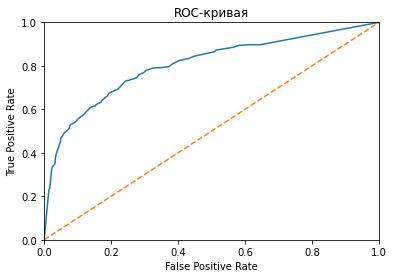

In [34]:
model_tree_cl = DecisionTreeClassifier(criterion = 'entropy', splitter='random', max_depth=10, 
                                       min_samples_leaf = 2, random_state=1357)
model_tree_cl.fit(features_train, target_train)

probabilities_val = model_tree_cl.predict_proba(features_val)
probabilities_one_val = probabilities_val[:, 1]

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val)

display(f'Площадь под ROC-кривой: {roc_auc_score(target_val, probabilities_one_val)}')

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Определили лучшие гиперпараметры с глубиной дерева: 10, splitter: random и min_samples_leaf: 2

Судя по равно высоким результатам accuracy на тренировочной и валидационной выборке модель 'Дерево решений' обучилась хорошо. 

Однако, accuracy валидационной выборки (0.85) не сильно превосхордит константную модель (на 0.79).

Зафиксировали результат F1 меры на валидационной выборке равный 0.56.

Площадь под ROC-кривой 0.8 больше константной модели (0.5).

### "Случайный лес" без учета дисбаланса

Аналогично проверим что покажет модель используя алгоритм "Случайный лес".

Лучшую глубину дерева мы уже определили: 10. Попробуем подобрать остальные гиперпараметры.

In [35]:
best_accuracy_train_rand_forest = 0.79
best_accuracy_val_rand_forest = 0.79
best_f1_val_rand_forest = 0
best_n_trees = 0
best_crit = 0

crit= ['gini', 'entropy']

for est in range(1, 21):
    for i in crit:
        model_rand_forest = RandomForestClassifier(
            criterion=i, 
            max_depth = 10, 
            random_state=1357, 
            n_estimators=est) 
        model_rand_forest.fit(features_train, target_train)
        predicted_val = model_rand_forest.predict(features_val)
        accuracy_train = model_rand_forest.score(features_train, target_train)
        accuracy_val = model_rand_forest.score(features_val, target_val)
        f1_val = f1_score(target_val, predicted_val)
        # остановимся на таких гиперпараметрах, когда f1-мера перестанет расти
        if f1_val >= best_f1_val_rand_forest:
            best_n_trees = est
            best_crit = i
            best_accuracy_train_rand_forest = accuracy_train
            best_accuracy_val_rand_forest = accuracy_val
            best_f1_val_rand_forest = f1_val
            
print(f'Лучший показатель кол-ва деревьев: {best_n_trees}')
print(f'Лучший criterion: {best_crit}')      
print()
print(f'Accuracy на train: {best_accuracy_train_rand_forest}')
print(f'Accuracy на val: {best_accuracy_val_rand_forest}') 
print()
print(f'F1 на val: {best_f1_val_rand_forest}')

Лучший показатель кол-ва деревьев: 16
Лучший criterion: entropy

Accuracy на train: 0.9008333333333334
Accuracy на val: 0.861

F1 на val: 0.5656249999999999


Используя лучшие гиперпараметры (глубины дерева: 10, кол-во деревьев: 16, criterion: entropy) еще раз обучим модель и построим ROC-кривую - посмотрим на соотношение полноты и доли ложных срабатываний при разных порогах. Также вычислим площадь под ней.

'Площадь под ROC-кривой: 0.8291942248004728'

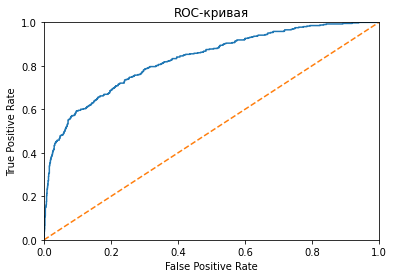

In [36]:
model_rand_forest = RandomForestClassifier(criterion = 'entropy', 
                                                   max_depth = 10, random_state=1357, n_estimators=16) 
model_rand_forest.fit(features_train, target_train)

probabilities_val = model_rand_forest.predict_proba(features_val)
probabilities_one_val = probabilities_val[:, 1]

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val)

display(f'Площадь под ROC-кривой: {roc_auc_score(target_val, probabilities_one_val)}')

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Определили лучшую глубину дерева равной 10 и кол-во деревьев 16. 

Разница в accuracy на тренировочной и валидационной выборках незначительная (0.4). Значит модель не сильно переобучена.

Accuracy модели 'Случайный лес' на валидационной выборке (0.86) незначительно превосходит константную модель (0.79). И чуть больше, чем accuracy модели 'Дерево решений' (0.85).

F1 мера модели 'Случайный лес' (0.56), рассчитанная на валидационной выборке, такая же как и в модели 'Дерево решений' (0.56).

Площадь под ROC-кривой модели 'Случайный лес' (0.829) больше константной модели (0.5), и чуть больше, чем в модели 'Дерево решений' (0.8).

### "Логистическая регрессия" без учета дисбаланса

Посмотрим результат алгоритма "Логистическая регрессия".

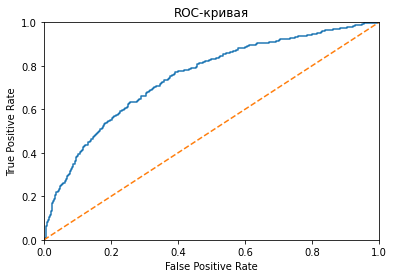

Accuracy на train: 0.8103333333333333
Accuracy на val: 0.811

F1 на val: 0.3127272727272727

Площадь под ROC-кривой: 0.7474997536703123


In [37]:
model_logregres = LogisticRegression(random_state=1357, solver='liblinear', max_iter=1000)
model_logregres.fit(features_train, target_train)

predicted_val = model_logregres.predict(features_val)

accuracy_train = model_logregres.score(features_train, target_train)
accuracy_val = model_logregres.score(features_val, target_val)

f1_val = f1_score(target_val, predicted_val)

probabilities_val = model_logregres.predict_proba(features_val)
probabilities_one_val = probabilities_val[:, 1]
roc_auc_val = roc_auc_score(target_val, probabilities_one_val)

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(f'Accuracy на train: {accuracy_train}')
print(f'Accuracy на val: {accuracy_val}')
print()
print(f'F1 на val: {f1_val}')
print()
print(f'Площадь под ROC-кривой: {roc_auc_val}')

Нет разницы в accuracy на тренировочной и валидационной выборках - модель не переобучена.

Accuracy модели 'Логистическая регрессия' на валидационной выборке (0.81) почти равна константной моделе (0.79). И сильно меньше, чем accuracy модели 'Дерево решений' (0.85) и  'Случайный лес' (0.86).

F1 мера модели 'Логистическая регрессия' (0.31), рассчитанная на валидационной выборке, в два раза ниже, чем у моделей 'Дерево решений' (0.56) и 'Случайный лес' (0.56).

Площадь под ROC-кривой модели 'Логистическая регрессия' (0.74) больше константной модели (0.5), но меньше площади модели 'Дерево решений' (0.8) и 'Случайный лес' (0.829).

Судя по всему модель 'Логистическая регрессия' сильней подвержена дисбалансу классов, чем остальные модели.

### **Выводы:** 

- Дисбаланс классов значительный 1:5;
- Все три использовавшихся модели 'Дерево решений', 'Случайный лес' и 'Логистическая регрессия' показали результаты accuracy чуть лучше, чем у константной модели;
- Лучший результат метрик продемонстрировала модель 'Случайный лес';
- Худший результат метрик у модели 'Логистическая регрессия' - максимально подвержена дисбалансу классов в выборке.


**Результаты метрик моделей**

'Константная модель':
- Accuracy на train: 0.796
- Accuracy на val: 0.796

'Дерево решений' (с глубиной дерева: 10, splitter: random и min_samples_leaf: 2):
- Accuracy на train: 0.878
- Accuracy на val: 0.8515
- F1 на val: 0.561
- Площадь под ROC-кривой: 0.803

'Случайный лес' (с глубиной дерева: 10 и кол-вом деревьев: 16, criterion: entropy):
- Accuracy на train: 0.9
- Accuracy на val: 0.861
- F1 на val: 0.565
- Площадь под ROC-кривой: 0.829

'Логистическая регрессия':
- Accuracy на train: 0.81
- Accuracy на val: 0.81
- F1 на val: 0.312
- Площадь под ROC-кривой: 0.747

## Борьба с дисбалансом

Попробуем улучшить качество модели, учитывая дисбаланс классов. Обучим разные модели и найдем лучшую. Сравним ее результаты с результатами без учета дисбаланса.

### Используем class_weight='balanced'
Для начала попробуем указать гиперпараметр class_weight='balanced', чтобы модель учла дисбалан классов в выборке.

Начнем с алгоритма 'Дерево решений'. 

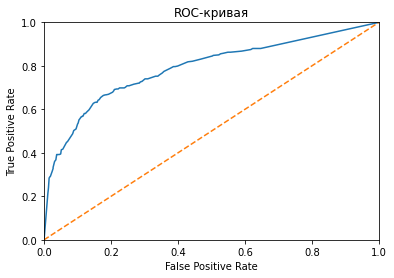

Accuracy на train: 0.8248333333333333
Accuracy на val: 0.7715

F1 на val: 0.5479723046488626

Площадь под ROC-кривой: 0.7885213444674352


In [38]:
model_tree_cl_weight = DecisionTreeClassifier(criterion = 'entropy', splitter='random', max_depth=10, 
                                              min_samples_leaf = 2, random_state=1357, class_weight='balanced')
model_tree_cl_weight.fit(features_train, target_train)

predicted_val_cl_weight = model_tree_cl_weight.predict(features_val)

accuracy_train_cl_weight = model_tree_cl_weight.score(features_train, target_train)
accuracy_val_cl_weight = model_tree_cl_weight.score(features_val, target_val)

f1_val_cl_weight = f1_score(target_val, predicted_val_cl_weight)

probabilities_val_cl_weight = model_tree_cl_weight.predict_proba(features_val)
probabilities_one_val_cl_weight = probabilities_val_cl_weight[:, 1]
roc_auc_val_cl_weight = roc_auc_score(target_val, probabilities_one_val_cl_weight)

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val_cl_weight)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(f'Accuracy на train: {accuracy_train_cl_weight}')
print(f'Accuracy на val: {accuracy_val_cl_weight}')
print()
print(f'F1 на val: {f1_val_cl_weight}')
print()
print(f'Площадь под ROC-кривой: {roc_auc_val_cl_weight}')

Показатели **'Дерево решений'** только ухудшились.

**Без учета баланса классов:**
- Accuracy на train: 0.878
- Accuracy на val: 0.8515
- F1 на val: 0.561
- Площадь под ROC-кривой: 0.803

**Стали с гиперпараметром class_weight='balanced':**
- Accuracy на train: 0.824
- Accuracy на val: 0.771
- F1 на val: 0.547
- Площадь под ROC-кривой: 0.788

Аналогично проверим "Случайный лес".

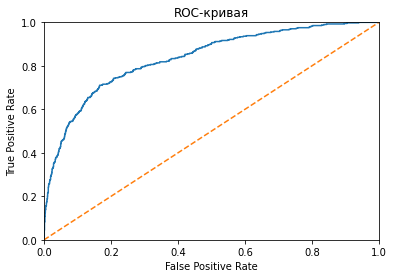

Accuracy на train: 0.907
Accuracy на val: 0.8275

F1 на val: 0.5974329054842473

Площадь под ROC-кривой: 0.8360006219824614


In [39]:
model_rand_forest_weight = RandomForestClassifier(criterion = 'entropy', max_depth = 10, 
                                           random_state=1357, n_estimators=16, class_weight='balanced') 
model_rand_forest_weight.fit(features_train, target_train)

predicted_val_forest_weight = model_rand_forest_weight.predict(features_val)

accuracy_train_forest_weight = model_rand_forest_weight.score(features_train, target_train)
accuracy_val_forest_weight = model_rand_forest_weight.score(features_val, target_val)

f1_val_forest_weight = f1_score(target_val, predicted_val_forest_weight)

probabilities_val_forest_weight = model_rand_forest_weight.predict_proba(features_val)
probabilities_one_val_forest_weight = probabilities_val_forest_weight[:, 1]
roc_auc_val_forest_weight = roc_auc_score(target_val, probabilities_one_val_forest_weight)

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val_forest_weight)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(f'Accuracy на train: {accuracy_train_forest_weight}')
print(f'Accuracy на val: {accuracy_val_forest_weight}')
print()
print(f'F1 на val: {f1_val_forest_weight}')
print()
print(f'Площадь под ROC-кривой: {roc_auc_val_forest_weight}')

Показатели **'Случайный лес'** незначительно улучшились. Отметим снижение показателя accuracy.

**Без учета баланса классов:**
- Accuracy на train: 0.9
- Accuracy на val: 0.861
- F1 на val: 0.565
- Площадь под ROC-кривой: 0.829

**Стали с гиперпараметром class_weight='balanced':**
- Accuracy на train: 0.907
- Accuracy на val: 0.827
- F1 на val: 0.597
- Площадь под ROC-кривой: 0.836

Теперь проверим как повлияет учет баланса классов на 'Логистическую регрессию'

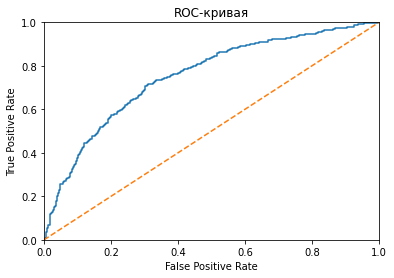

Accuracy на train: 0.7113333333333334
Accuracy на val: 0.7065

F1 на val: 0.4782222222222222

Площадь под ROC-кривой: 0.752193873780668


In [40]:
model_logregres_weight = LogisticRegression(random_state=1357, solver='liblinear', 
                                     max_iter=1000, class_weight='balanced')
model_logregres_weight.fit(features_train, target_train)

predicted_val_logregres_weight = model_logregres_weight.predict(features_val)

accuracy_train_logregres_weight = model_logregres_weight.score(features_train, target_train)
accuracy_val_logregres_weight = model_logregres_weight.score(features_val, target_val)

f1_val_logregres_weight = f1_score(target_val, predicted_val_logregres_weight)

probabilities_val_logregres_weight = model_logregres_weight.predict_proba(features_val)
probabilities_one_val_logregres_weight = probabilities_val_logregres_weight[:, 1]
roc_auc_val_logregres_weight = roc_auc_score(target_val, probabilities_one_val_logregres_weight)

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val_logregres_weight)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(f'Accuracy на train: {accuracy_train_logregres_weight}')
print(f'Accuracy на val: {accuracy_val_logregres_weight}')
print()
print(f'F1 на val: {f1_val_logregres_weight}')
print()
print(f'Площадь под ROC-кривой: {roc_auc_val_logregres_weight}')

Показатели **'Логистическая регрессия'** улучшились. Отметим снижение показателя accuracy.

**Без учета баланса классов:**
- Accuracy на train: 0.81
- Accuracy на val: 0.81
- F1 на val: 0.312
- Площадь под ROC-кривой: 0.747

**Стали с гиперпараметром class_weight='balanced':**
- Accuracy на train: 0.711
- Accuracy на val: 0.706
- F1 на val: 0.478
- Площадь под ROC-кривой: 0.752

### Увеличение выборки (upsampling)

Увеличим обьекты класса 1 до пропорции 1:1.

In [41]:
# напишем функцию для увеличения выборки
def upsample(features, target, repeat):
    # поделим выборку на отрицательные и положительные обьекты
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    # увеличим положительные обьекты на repeat раз
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    # перемешаем обьекты
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1357)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Проверим соотношение классов после увеличения

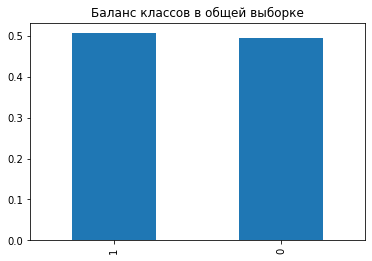

In [42]:
(target_upsampled.value_counts(normalize=True)
 .plot(kind='bar', title='Баланс классов в общей выборке'));

Посмотрим на результат 'Дерева решений' после увеличения класса 1

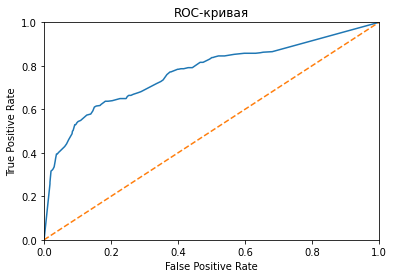

Accuracy на train: 0.824332712600869
Accuracy на val: 0.774

F1 на val: 0.5349794238683128

Площадь под ROC-кривой: 0.7693923046605577


In [43]:
model_tree_cl_up = DecisionTreeClassifier(criterion = 'entropy', splitter='random', max_depth=10, 
                                          min_samples_leaf = 2, random_state=1357,)
model_tree_cl_up.fit(features_upsampled, target_upsampled)

predicted_val_cl_up = model_tree_cl_up.predict(features_val)

accuracy_train_cl_up = model_tree_cl_up.score(features_upsampled, target_upsampled)
accuracy_val_cl_up = model_tree_cl_up.score(features_val, target_val)

f1_val_cl_up = f1_score(target_val, predicted_val_cl_up)

probabilities_val_cl_up = model_tree_cl_up.predict_proba(features_val)
probabilities_one_val_cl_up = probabilities_val_cl_up[:, 1]
roc_auc_val_cl_up = roc_auc_score(target_val, probabilities_one_val_cl_up)

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val_cl_up)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(f'Accuracy на train: {accuracy_train_cl_up}')
print(f'Accuracy на val: {accuracy_val_cl_up}')
print()
print(f'F1 на val: {f1_val_cl_up}')
print()
print(f'Площадь под ROC-кривой: {roc_auc_val_cl_up}')

Нет особой разницы в показателях между гиперпараметром class_weight='balanced' и увеличением класса методом upsampling.

**Без учета баланса классов:**
- Accuracy на train: 0.878
- Accuracy на val: 0.8515
- F1 на val: 0.561
- Площадь под ROC-кривой: 0.803

**C гиперпараметром class_weight='balanced':**
- Accuracy на train: 0.824
- Accuracy на val: 0.771
- F1 на val: 0.547
- Площадь под ROC-кривой: 0.788

**С использованием upsampling:**
- Accuracy на train: 0.824
- Accuracy на val: 0.774
- F1 на val: 0.534
- Площадь под ROC-кривой: 0.769


Проверим как работает увеличение 1 на примере 'Случайный лес'

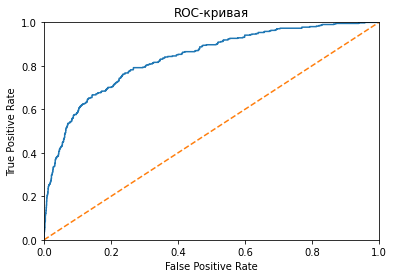

Accuracy на train: 0.8849575832816057
Accuracy на val: 0.812

F1 на val: 0.591304347826087

Площадь под ROC-кривой: 0.8362600379347719


In [44]:
model_rand_forest_up = RandomForestClassifier(criterion = 'entropy', max_depth = 10, 
                                           random_state=1357, n_estimators=16) 
model_rand_forest_up.fit(features_upsampled, target_upsampled)

predicted_val_forest_up = model_rand_forest_up.predict(features_val)

accuracy_train_forest_up = model_rand_forest_up.score(features_upsampled, target_upsampled)
accuracy_val_forest_up = model_rand_forest_up.score(features_val, target_val)

f1_val_forest_up = f1_score(target_val, predicted_val_forest_up)

probabilities_val_forest_up = model_rand_forest_up.predict_proba(features_val)
probabilities_one_val_forest_up = probabilities_val_forest_up[:, 1]
roc_auc_val_forest_up = roc_auc_score(target_val, probabilities_one_val_forest_up)

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val_forest_up)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(f'Accuracy на train: {accuracy_train_forest_up}')
print(f'Accuracy на val: {accuracy_val_forest_up}')
print()
print(f'F1 на val: {f1_val_forest_up}')
print()
print(f'Площадь под ROC-кривой: {roc_auc_val_forest_up}')

Нет особой разницы в показателях между гиперпараметром class_weight='balanced' и увеличением класса методом upsampling.

**Без учета баланса классов:**
- Accuracy на train: 0.9
- Accuracy на val: 0.861
- F1 на val: 0.565
- Площадь под ROC-кривой: 0.829

**С гиперпараметром class_weight='balanced':**
- Accuracy на train: 0.907
- Accuracy на val: 0.827
- F1 на val: 0.597
- Площадь под ROC-кривой: 0.836

**С использованием upsampling:**
- Accuracy на train: 0.884
- Accuracy на val: 0.812
- F1 на val: 0.591
- Площадь под ROC-кривой: 0.836

Проверим как отреагирует модель 'Логистическая регрессия' на увеличение класса 1

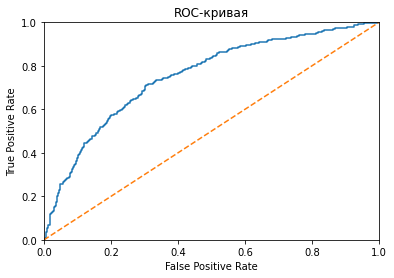

Accuracy на train: 0.7108421270432443
Accuracy на val: 0.7035

F1 на val: 0.47753303964757704

Площадь под ROC-кривой: 0.7522431397181988


In [45]:
model_logregres_up = LogisticRegression(random_state=1357, solver='liblinear', 
                                     max_iter=1000)
model_logregres_up.fit(features_upsampled, target_upsampled)

predicted_val_logregres_up = model_logregres_up.predict(features_val)

accuracy_train_logregres_up = model_logregres_up.score(features_upsampled, target_upsampled)
accuracy_val_logregres_up = model_logregres_up.score(features_val, target_val)

f1_val_logregres_up = f1_score(target_val, predicted_val_logregres_up)

probabilities_val_logregres_up = model_logregres_up.predict_proba(features_val)
probabilities_one_val_logregres_up = probabilities_val_logregres_up[:, 1]
roc_auc_val_logregres_up = roc_auc_score(target_val, probabilities_one_val_logregres_up)

fpr, tpr, thresholds = roc_curve(target_val, probabilities_one_val_logregres_up)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(f'Accuracy на train: {accuracy_train_logregres_up}')
print(f'Accuracy на val: {accuracy_val_logregres_up}')
print()
print(f'F1 на val: {f1_val_logregres_up}')
print()
print(f'Площадь под ROC-кривой: {roc_auc_val_logregres_up}')

Показатели **'Логистической регрессии'** не изменились.

**Без учета баланса классов:**
- Accuracy на train: 0.81
- Accuracy на val: 0.81
- F1 на val: 0.312
- Площадь под ROC-кривой: 0.747

**С гиперпараметром class_weight='balanced':**
- Accuracy на train: 0.711
- Accuracy на val: 0.706
- F1 на val: 0.478
- Площадь под ROC-кривой: 0.752

**С использованием upsampling:**
- Accuracy на train: 0.71
- Accuracy на val: 0.703
- F1 на val: 0.477
- Площадь под ROC-кривой: 0.752

Лучше всех показала себя модель 'Случайный лес' с балансировкой классов гиперпараметром class_weight='balanced'.

### **Выводы:**

Применили 2 метода изменения дисбаланса классов - гиперпараметр class_weight='balanced' и upsampling:
- Лучше всех показала себя модель 'Случайный лес' с использованием class_weight='balanced';
- Модель 'Дерево решений' не продемонстрировала изменения в показателях метрик;
- Модель 'Логистическая регрессия' показала значительный рост показателя метрики f1 после выравнивания баланса классов;
- После выравнивания баланса классов показатель accuracy снизился.

**Результаты метрик моделей**

1) Показатели **'Дерево решений'**

Без учета баланса классов:
- Accuracy на train: 0.878
- Accuracy на val: 0.8515
- F1 на val: 0.561
- Площадь под ROC-кривой: 0.803

C гиперпараметром class_weight='balanced':
- Accuracy на train: 0.824
- Accuracy на val: 0.771
- F1 на val: 0.547
- Площадь под ROC-кривой: 0.788

С использованием upsampling:
- Accuracy на train: 0.824
- Accuracy на val: 0.774
- F1 на val: 0.534
- Площадь под ROC-кривой: 0.769



2) Показатели **'Случайный лес'** 

Без учета баланса классов:
- Accuracy на train: 0.9
- Accuracy на val: 0.861
- F1 на val: 0.565
- Площадь под ROC-кривой: 0.829

С гиперпараметром class_weight='balanced':
- Accuracy на train: 0.907
- Accuracy на val: 0.827
- F1 на val: 0.597
- Площадь под ROC-кривой: 0.836

С использованием upsampling:
- Accuracy на train: 0.884
- Accuracy на val: 0.812
- F1 на val: 0.591
- Площадь под ROC-кривой: 0.836



3) Показатели **'Логистической регрессии'**

Без учета баланса классов:
- Accuracy на train: 0.81
- Accuracy на val: 0.81
- F1 на val: 0.312
- Площадь под ROC-кривой: 0.747

С гиперпараметром class_weight='balanced':
- Accuracy на train: 0.711
- Accuracy на val: 0.706
- F1 на val: 0.478
- Площадь под ROC-кривой: 0.752

С использованием upsampling:
- Accuracy на train: 0.71
- Accuracy на val: 0.703
- F1 на val: 0.477
- Площадь под ROC-кривой: 0.752

## Тестирование модели

Проверим качество модели "Случайный лес" на тестовой выборке.

Применим лучшие гиперпараметры глубины дерева равной 10 и ко-ву деревьев равной 20 в алгоритме "Случайный лес". Будем использовать сбалансированную upsampling выборку для обучения модели.

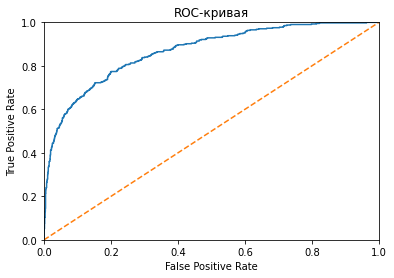

Accuracy на train: 0.907
Accuracy на test: 0.8455

F1 на test: 0.6308243727598567

Площадь под ROC-кривой на test: 0.8669840873230704


In [46]:
model_rand_forest_weight = RandomForestClassifier(criterion = 'entropy', max_depth = 10, 
                                                  random_state=1357, n_estimators=16, class_weight='balanced') 
model_rand_forest_weight.fit(features_train, target_train)

predicted_test_forest_weight = model_rand_forest_weight.predict(features_test)

accuracy_train_forest_weight = model_rand_forest_weight.score(features_train, target_train)
accuracy_test_forest_weight = model_rand_forest_weight.score(features_test, target_test)

f1_test_forest_weight = f1_score(target_test, predicted_test_forest_weight)

probabilities_test_forest_weight = model_rand_forest_weight.predict_proba(features_test)
probabilities_one_test_forest_weight = probabilities_test_forest_weight[:, 1]
roc_auc_test_forest_weight = roc_auc_score(target_test, probabilities_one_test_forest_weight)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_forest_weight)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

print(f'Accuracy на train: {accuracy_train_forest_weight}')
print(f'Accuracy на test: {accuracy_test_forest_weight}')
print()
print(f'F1 на test: {f1_test_forest_weight}')
print()
print(f'Площадь под ROC-кривой на test: {roc_auc_test_forest_weight}')

**Выводы:** 

Модель "Случайный лес" успешно прошла проверку на тестовой выборке с результатами: 

- Accuracy на train: 0.907
- Accuracy на test: 0.8455
- F1 на test: 0.63
- Площадь под ROC-кривой на test: 0.866

## **Общий вывод:**

Проведено исследование исторических данных о поведении клиентов и расторжении договоров с банком.

По результатам исследования ставилась цель построить модель прогнозирования, которая будет определять уйдёт клиент из банка в ближайшее время или нет, с предельно большим значением *F1*-меры (более 0.59).

**Результаты ознакомления с данными:**

- 9% строк пропусков столбца Tenure (сколько лет человек является клиентом банка) заполнены медианой в разбивке по целевому признаку;
- Избыточные для обучения параметры RowNumber (индекс строки в данных), CustomerId (уникальный идентификатор клиента) и Surname (фамилия) выведены в отдельную таблицу;
- Отсутсвует мультиколлинеарность признаков;
- Распределение кредитного рейтинга, возраста клиентов и баланса на счете похоже на нормальное. Распределение остальных числовых параметров далеки от нормального;
- Преобладающее большинство (36%) клиентов имеют нулевой баланс на счетах. Более того, 14% спящих клиентов из представленных данных с нулевыми остатками, и они не покинули банк. Об этом нужно сказать бизнесу, так как модель, используя эти данные, может ориентироваться на таких не приносящих прибыль клиентов. В рамках текущей задачи этот факт не учитывается;
- У большинства клиентов открыты по одному или двум продуктам;
- В данных разный баланс классов (1:5) - покинувших банк клиентов сильно меньше (20%).

**Исследование разных моделей и борьба с дисбалансом классов:**

Проведена работа по подбору гиперпараметров 3-х разных моделей ('Дерево решений', 'Случайный лес' и 'Логистическая регрессия') **без учета дисбаланса классов**:

- В результате использования наиболее подходящих гиперпараметров все три модели показали результат метрики accuracy чуть лучше, чем у константной модели.
- Лучший результат метрик продемонстрировала модель 'Случайный лес';
- Худший результат метрик у модели 'Логистическая регрессия' - максимально подвержена дисбалансу классов в выборке.

Протестированы 2 метода **балансировки классов** - гиперпараметр class_weight='balanced' и upsampling:
- Лучше всех показала себя модель 'Случайный лес' с использованием class_weight='balanced';
- Модель 'Дерево решений' не продемонстрировала изменения в показателях метрик после балансировки;
- Модель 'Логистическая регрессия' показала значительный рост показателя метрики f1 после выравнивания баланса классов;
- После выравнивания баланса классов показатель accuracy снизился.

По результатам исследования выявлена лучшая модель 'Случайный лес' с параметрами:
- глубина дерева 10;
- количество деревьев равной 16;
- с использованием критерия 'entropy';
- модель обучалась на выборке, сбалансированной методом class_weight='balanced'.

**Рекомендованная к использованию модель 'Случайный лес'** показала следующие результаты на тестовой выборке:
- Accuracy на train: 0.907
- Accuracy на test: 0.8455
- F1 на test: 0.63 (> 0.59)
- Площадь под ROC-кривой на test: 0.866

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*